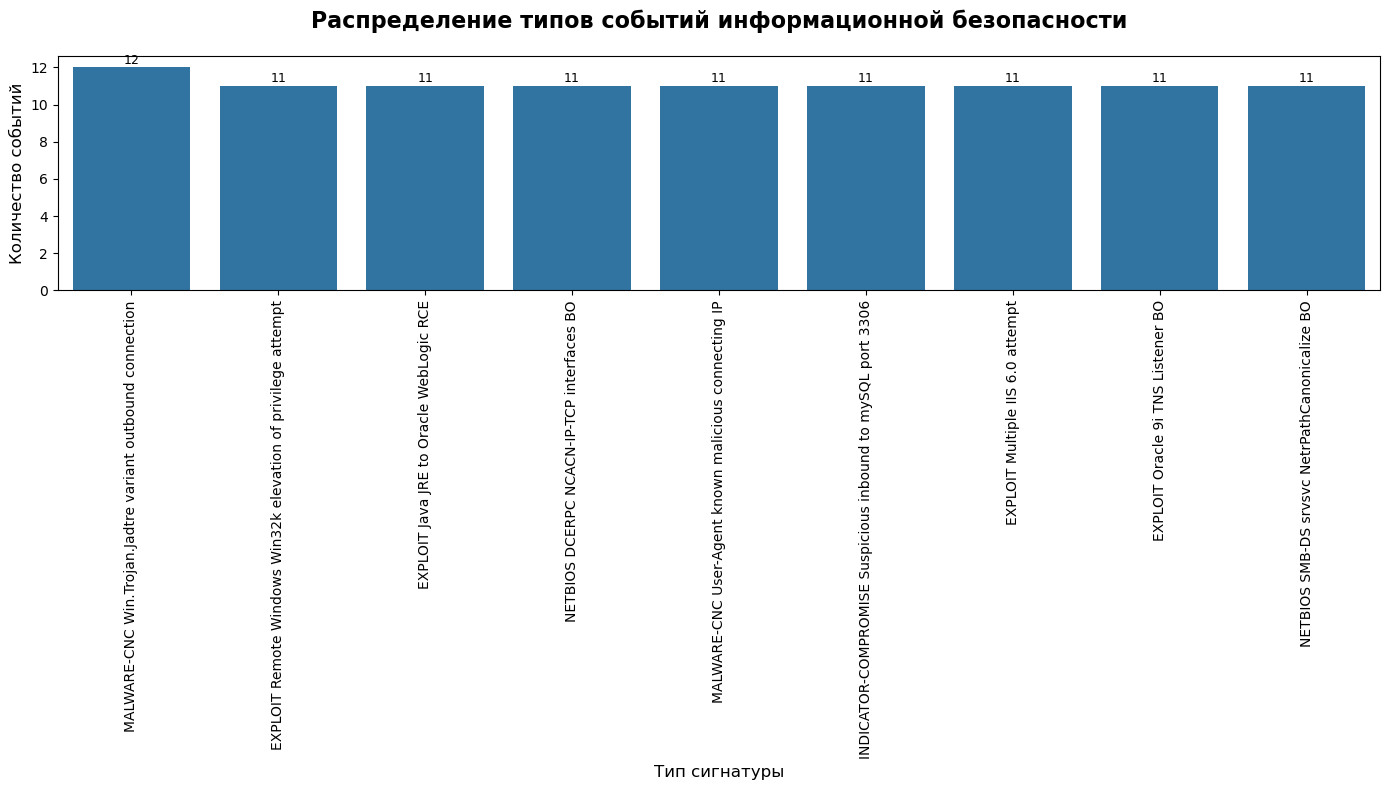

СТАТИСТИКА СОБЫТИЙ:
Всего событий: 100
Уникальных сигнатур: 9

Распределение событий по типам:
- MALWARE-CNC Win.Trojan.Jadtre variant outbound connection: 12 событий (12.0%)
- EXPLOIT Remote Windows Win32k elevation of privilege attempt: 11 событий (11.0%)
- EXPLOIT Java JRE to Oracle WebLogic RCE: 11 событий (11.0%)
- NETBIOS DCERPC NCACN-IP-TCP interfaces BO: 11 событий (11.0%)
- MALWARE-CNC User-Agent known malicious connecting IP: 11 событий (11.0%)
- INDICATOR-COMPROMISE Suspicious inbound to mySQL port 3306: 11 событий (11.0%)
- EXPLOIT Multiple IIS 6.0 attempt: 11 событий (11.0%)
- EXPLOIT Oracle 9i TNS Listener BO: 11 событий (11.0%)
- NETBIOS SMB-DS srvsvc NetrPathCanonicalize BO: 11 событий (11.0%)

Данные сохранены в 'security_events_analysis.csv'


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 1. Загрузка данных из JSON файла
with open('events.json', 'r') as file:
    data = json.load(file)

# 2. Преобразование в DataFrame
df = pd.DataFrame(data["events"])

# 3. Визуализация распределения событий
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="signature", order=df['signature'].value_counts().index)

# Настройка графика
plt.title("Распределение типов событий информационной безопасности", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Тип сигнатуры", fontsize=12)
plt.ylabel("Количество событий", fontsize=12)
plt.xticks(rotation=90)

# Добавляем значения на столбцы
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=9)

plt.tight_layout()

# Сохраняем график
plt.savefig('security_events_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Выводим статистику
print("="*60)
print("СТАТИСТИКА СОБЫТИЙ:")
print("="*60)
print(f"Всего событий: {len(df)}")
print(f"Уникальных сигнатур: {df['signature'].nunique()}")
print("\nРаспределение событий по типам:")

event_counts = df['signature'].value_counts()
for signature, count in event_counts.items():
    percentage = (count / len(df)) * 100
    print(f"- {signature}: {count} событий ({percentage:.1f}%)")

# Сохраняем данные в CSV
df.to_csv('security_events_analysis.csv', index=False)
print(f"\nДанные сохранены в 'security_events_analysis.csv'")